<a href="https://colab.research.google.com/github/KJBotheju/CNN-classifier/blob/main/cat_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets -q

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kavindabotheju
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification


100%|██████████| 217M/217M [00:02<00:00, 82.3MB/s]


In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = (128,128)

In [ ]:
train_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/train"
test_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/test"

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset="training",
                                                         validation_split=0.1,
                                                         seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset="validation",
                                                         validation_split=0.1,
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         )

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [ ]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

In [ ]:
for image_batch,label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


In [ ]:
for image_batch,label_batch in train_data.take(2):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)
(32, 128, 128, 3)
(32,)


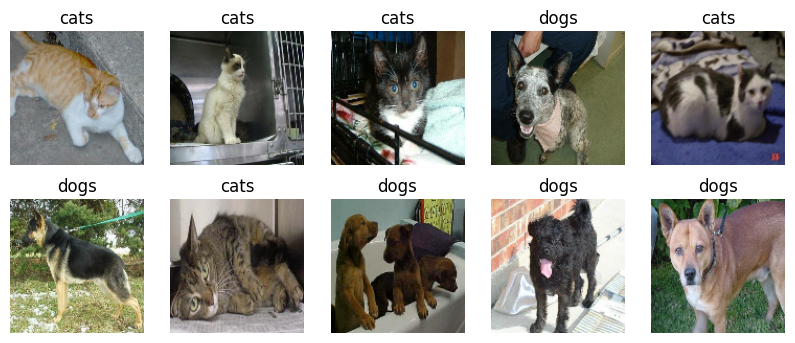

In [ ]:
#plot data samples
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
  for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis('off')

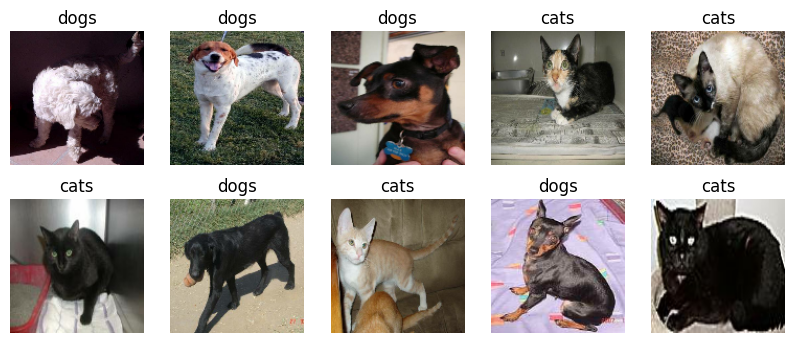

In [ ]:
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
  for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis('off')

In [ ]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[ 85.07135    95.16901   118.6026   ]
   [ 73.450806   51.834015   96.53674  ]
   [ 77.49155    41.6745     96.203766 ]
   ...
   [141.32031   101.359375   84.67969  ]
   [139.01562   101.97656    85.97656  ]
   [136.        103.         86.       ]]

  [[ 91.555084  108.553894  115.95703  ]
   [ 86.658966   74.99762   104.00662  ]
   [ 74.58209    42.252106   91.69345  ]
   ...
   [140.66797   103.02734    85.34766  ]
   [141.31522   105.62143    88.58389  ]
   [139.30469   106.30469    88.609375 ]]

  [[ 94.50064   113.828766  114.16342  ]
   [ 93.45697    98.646454  109.95505  ]
   [ 79.53265    62.58133    97.458435 ]
   ...
   [140.50781   104.         85.75391  ]
   [138.49615   106.47272    85.48834  ]
   [139.        107.         85.50781  ]]

  ...

  [[207.2461    194.2461    188.2461   ]
   [207.7539    195.7539    183.73828  ]
   [206.67508   194.67508   180.67508  ]
   ...
   [206.48898   199.48898   191.48898  ]
   [206.29501   201.27939   195.27554  ]
   [2

In [ ]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [ ]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[1.03441381e-03 8.35347630e-04 4.63283359e-04]
   [2.09956523e-03 1.50382088e-03 7.98430876e-04]
   [2.16290960e-03 1.51674403e-03 7.55177345e-04]
   ...
   [2.66556139e-03 2.31185113e-03 1.54291617e-03]
   [2.64513656e-03 2.29142653e-03 1.52249134e-03]
   [2.60126730e-03 2.24755704e-03 1.47862209e-03]]

  [[9.15476703e-04 7.42178119e-04 5.89016243e-04]
   [1.88941753e-03 1.35494757e-03 8.14410334e-04]
   [2.04248074e-03 1.47274800e-03 7.30427273e-04]
   ...
   [2.69127265e-03 2.33756262e-03 1.56862743e-03]
   [2.66577816e-03 2.31206813e-03 1.54313305e-03]
   [2.62128748e-03 2.26757745e-03 1.49864238e-03]]

  [[8.95749254e-04 7.75843451e-04 7.72879168e-04]
   [1.41904550e-03 1.03571755e-03 6.67710963e-04]
   [1.72607414e-03 1.23706274e-03 6.23815460e-04]
   ...
   [2.70665134e-03 2.35294132e-03 1.58400612e-03]
   [2.67589395e-03 2.32218392e-03 1.55324873e-03]
   [2.60885223e-03 2.25514220e-03 1.48620724e-03]]

  ...

  [[2.96604587e-03 2.75074411e-03 1.99718750e-03]
   [2

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.2),
    ]
)

In [ ]:
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)      

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=20,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/20
225/225 [==============================] - 19s 44ms/step - loss: 0.6956 - accuracy: 0.4932 - val_loss: 0.6951 - val_accuracy: 0.4950
Epoch 2/20
225/225 [==============================] - 9s 39ms/step - loss: 0.6950 - accuracy: 0.4922 - val_loss: 0.6932 - val_accuracy: 0.5050
Epoch 3/20
225/225 [==============================] - 9s 39ms/step - loss: 0.6939 - accuracy: 0.4990 - val_loss: 0.6931 - val_accuracy: 0.5050
Epoch 4/20
225/225 [==============================] - 10s 42ms/step - loss: 0.6935 - accuracy: 0.4950 - val_loss: 0.6931 - val_accuracy: 0.5050
Epoch 5/20
225/225 [==============================] - 10s 44ms/step - loss: 0.6933 - accuracy: 0.4964 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 6/20
225/225 [==============================] - 10s 43ms/step - loss: 0.6934 - accuracy: 0.4976 - val_loss: 0.6931 - val_accuracy: 0.5050
Epoch 7/20
225/225 [==============================] - 8s 36ms/step - loss: 0.6933 - accuracy: 0.4894 - val_loss: 0.6931 - val_accuracy: 0.

In [ ]:
history.history

{'loss': [0.6955934762954712,
  0.6950319409370422,
  0.6939176321029663,
  0.6935051679611206,
  0.6932578086853027,
  0.6934025287628174,
  0.6932655572891235,
  0.6931986212730408,
  0.6931868195533752,
  0.6931788921356201,
  0.6931923031806946,
  0.6931736469268799,
  0.6931709051132202,
  0.6931817531585693,
  0.6931766271591187,
  0.6931777596473694,
  0.6931774020195007,
  0.6931818723678589,
  0.6931890845298767,
  0.693187952041626],
 'accuracy': [0.49319443106651306,
  0.49222221970558167,
  0.4990277886390686,
  0.4950000047683716,
  0.49638888239860535,
  0.49763888120651245,
  0.48944443464279175,
  0.4947222173213959,
  0.48750001192092896,
  0.4972222149372101,
  0.4927777647972107,
  0.4948611259460449,
  0.4933333396911621,
  0.49291667342185974,
  0.4970833361148834,
  0.49319443106651306,
  0.4927777647972107,
  0.4958333373069763,
  0.49694445729255676,
  0.4863888919353485],
 'val_loss': [0.6950930953025818,
  0.6931565999984741,
  0.6931182742118835,
  0.69314599

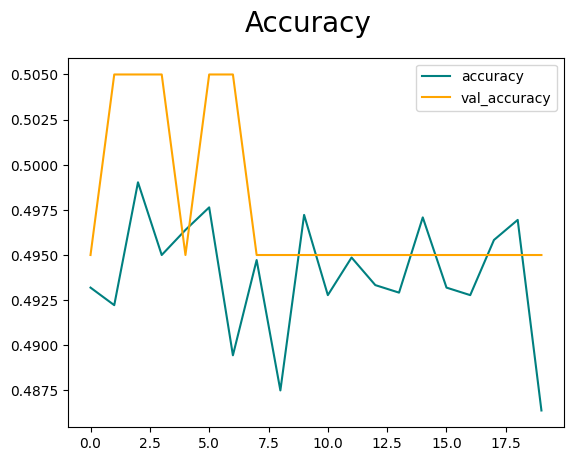

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

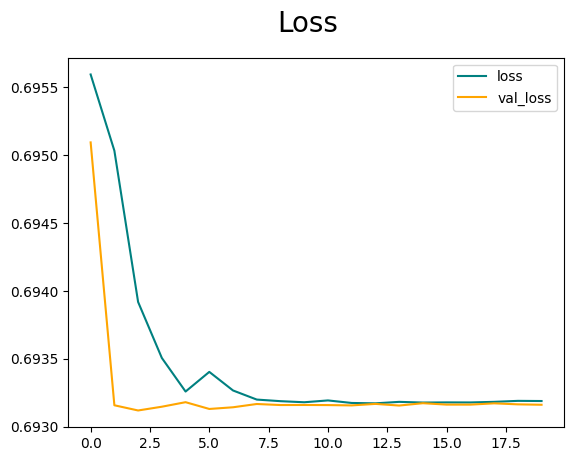

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

In [ ]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [ ]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 350ms/step


In [ ]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.48424068>

In [ ]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.338>

In [ ]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.489>

In [ ]:
!pip install opencv-python

In [ ]:
import cv2

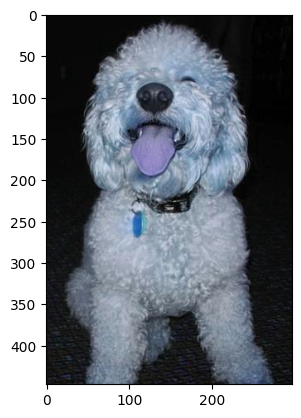

In [ ]:
image = cv2.imread("/content/cats-and-dogs-for-classification/cats_dogs/test/dogs/dog.4003.jpg")
plt.imshow(image)
plt.show()

In [ ]:
resized_image = tf.image.resize(image, IMAGE_SIZE)
scaled_image = resized_image/255

In [ ]:
scaled_image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.15981302, 0.23411459, 0.24587929],
        [0.14971493, 0.21621644, 0.22798115],
        [0.17982441, 0.2350167 , 0.24799183],
        ...,
        [0.20432009, 0.32196715, 0.42000636],
        [0.20423393, 0.321881  , 0.4199202 ],
        [0.19238664, 0.3100337 , 0.40807292]],

       [[0.1679934 , 0.23466007, 0.24642478],
        [0.13985644, 0.19867997, 0.21044467],
        [0.17941177, 0.22542892, 0.2411152 ],
        ...,
        [0.20629524, 0.3239423 , 0.4219815 ],
        [0.20508315, 0.3227302 , 0.42076942],
        [0.20461091, 0.32225797, 0.42029718]],

       [[0.14986165, 0.21015601, 0.22244132],
        [0.12994504, 0.18191971, 0.19582975],
        [0.1873279 , 0.22816737, 0.24385364],
        ...,
        [0.23621084, 0.3397954 , 0.4417562 ],
        [0.23330413, 0.3368887 , 0.43884948],
        [0.22210477, 0.33975184, 0.43779105]],

       ...,

       [[0.49244767, 0.51989865, 0.59440845],
        [0.48

In [ ]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

In [ ]:
yhat = model.predict(np.expand_dims(scaled_image, 0))

1/1 [==============================] - 0s 34ms/step


In [ ]:
yhat

array([[0.5255868]], dtype=float32)

In [ ]:
class_names

['cats', 'dogs']

In [ ]:
if yhat >= 0.5:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')

dogs
